In [2]:
import pandas as pd
import numpy as np

### Timestamp

In [3]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [4]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [5]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### Datetimeindex

In [6]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'),
                             pd.Timestamp('2016-09-02'),
                             pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [7]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Periodindex

In [8]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'),
                             pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [9]:
type(t2)

pandas.core.series.Series

### Converting to Datetime

In [10]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4, 2)), index=d1,
                   columns=list('ab'))
ts3

,a,b
2 June 2013,87,38
"Aug 29, 2014",25,51
2015-06-26,16,57
7/12/16,41,78


In [11]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,87,38
2014-08-29,25,51
2015-06-26,16,57
2016-07-12,41,78


In [12]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [13]:
pd.Timestamp('9/3/2016') - pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [14]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [15]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [16]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                   'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,96,128
2016-10-16,97,126
2016-10-30,106,117
2016-11-13,110,125
2016-11-27,111,124
2016-12-11,109,122
2016-12-25,106,128
2017-01-08,103,117
2017-01-22,106,120


In [17]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [18]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,1.0,-2.0
2016-10-30,9.0,-9.0
2016-11-13,4.0,8.0
2016-11-27,1.0,-1.0
2016-12-11,-2.0,-2.0
2016-12-25,-3.0,6.0
2017-01-08,-3.0,-11.0
2017-01-22,3.0,3.0


In [19]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,99.666667,123.666667
2016-11-30,110.500000,124.500000
2016-12-31,107.500000,125.000000
2017-01-31,104.500000,118.500000


In [20]:
df['2017']

,Count 1,Count 2
2017-01-08,103,117
2017-01-22,106,120


In [21]:
df['2016-12']

,Count 1,Count 2
2016-12-11,109,122
2016-12-25,106,128


In [22]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,109,122
2016-12-25,106,128
2017-01-08,103,117
2017-01-22,106,120


In [23]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,96,128
2016-10-09,96,128
2016-10-16,97,126
2016-10-23,97,126
2016-10-30,106,117
2016-11-06,106,117
2016-11-13,110,125
2016-11-20,110,125
2016-11-27,111,124
2016-12-04,111,124


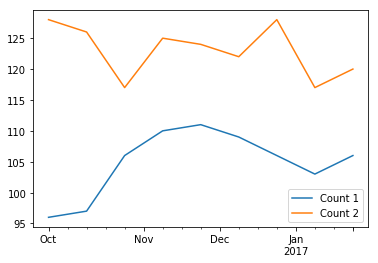

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()